In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [2]:
df=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Data Cleaning**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats

In [6]:
print("shape:", df.shape)

shape: (1025, 14)


In [7]:
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
display(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [11]:
display((df.isnull().mean()*100).sort_values(ascending=False))


age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [12]:
df.replace('?', np.nan, inplace=True)

In [13]:
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']


In [14]:
for c in cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [15]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
num_cols = ['age','trestbps','chol','thalach','oldpeak']

In [17]:
for c in cat_cols:
    print(c, "unique:", df[c].unique(), "counts:", df[c].value_counts(dropna=False).to_dict())


sex unique: [1 0] counts: {1: 713, 0: 312}
cp unique: [0 1 2 3] counts: {0: 497, 2: 284, 1: 167, 3: 77}
fbs unique: [0 1] counts: {0: 872, 1: 153}
restecg unique: [1 0 2] counts: {1: 513, 0: 497, 2: 15}
exang unique: [0 1] counts: {0: 680, 1: 345}
slope unique: [2 0 1] counts: {1: 482, 2: 469, 0: 74}
ca unique: [2 0 1 3 4] counts: {0: 578, 1: 226, 2: 134, 3: 69, 4: 18}
thal unique: [3 2 1 0] counts: {2: 544, 3: 410, 1: 64, 0: 7}


In [18]:
missing_pct = df.isnull().mean() * 100

In [19]:
print(missing_pct.sort_values(ascending=False))


age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


In [20]:
X = df.drop(columns=['target'])
y = df['target'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [21]:
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (820, 13) Test: (205, 13)


In [22]:
def iqr_outlier_count(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((s < lower) | (s > upper)).sum()

In [23]:
for c in num_cols:
    print(c, "outliers (IQR method):", iqr_outlier_count(X_train[c].dropna()))
    

age outliers (IQR method): 0
trestbps outliers (IQR method): 29
chol outliers (IQR method): 13
thalach outliers (IQR method): 3
oldpeak outliers (IQR method): 7


In [24]:
z = np.abs(stats.zscore(X_train[num_cols].dropna()))

In [25]:
print("z-score > 3 counts per row:", (z>3).sum(axis=1).sum())

z-score > 3 counts per row: 27


In [26]:
skewness = X_train[num_cols].skew().abs().sort_values(ascending=False)

In [27]:
print("Skewness (train):")
print(skewness)


Skewness (train):
oldpeak     1.265389
chol        0.939756
trestbps    0.766167
thalach     0.492480
age         0.271794
dtype: float64


In [28]:
skewed_feats = skewness[skewness > 1].index.tolist()

In [29]:
print("skewed numeric features to consider log1p:", skewed_feats)

skewed numeric features to consider log1p: ['oldpeak']


In [30]:
skewed_feats = skewed_feats 

num_log = [c for c in num_cols if c in skewed_feats]
num_no_log = [c for c in num_cols if c not in skewed_feats]

In [31]:
num_log_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())   
])

In [32]:
num_no_log_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())     
])


In [33]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [34]:
preprocessor = ColumnTransformer(transformers=[
    ('num_log', num_log_pipeline, num_log),
    ('num_nolog', num_no_log_pipeline, num_no_log),
    ('cat', cat_pipeline, cat_cols)
], remainder='drop')

In [35]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)


**Basic Level Questions**

**1.What is the average age of patients in the dataset?**


In [36]:
avg_age = df['age'].mean()

In [37]:
print(f"Average age of patients: {avg_age:.2f} years")

Average age of patients: 54.43 years


**2.What is the gender distribution of patients?**

In [38]:
gender_counts = df['sex'].value_counts()

In [39]:
print(gender_counts)

sex
1    713
0    312
Name: count, dtype: int64


In [40]:
gender_percent = df['sex'].value_counts(normalize=True) * 100

In [41]:
print(gender_percent)

sex
1    69.560976
0    30.439024
Name: proportion, dtype: float64


**3.What is the average resting blood pressure of patients?**

In [56]:
avg_bp = df['trestbps'].mean()

In [57]:
print(f"Average resting blood pressure: {avg_bp:.2f} mm Hg")

Average resting blood pressure: 131.61 mm Hg


**4.How many patients have fasting blood sugar levels higher than 120 mg/dl?**


In [58]:
high_fbs_count = df['fbs'].sum()

In [45]:
print(f"Number of patients with fasting blood sugar > 120 mg/dl: {high_fbs_count}")


Number of patients with fasting blood sugar > 120 mg/dl: 153


**5.What are the different types of chest pain recorded in the dataset?**


In [46]:
chest_pain_types = df['cp'].unique()

In [47]:
print("Chest pain types in dataset:", chest_pain_types)


Chest pain types in dataset: [0 1 2 3]


**6.What is the maximum heart rate achieved by patients?**


In [48]:
max_hr = df['thalach'].max()

In [49]:
print(f"Maximum heart rate achieved: {max_hr} bpm")


Maximum heart rate achieved: 202 bpm


**7.What percentage of patients experience exercise-induced angina?**


In [50]:
exang_pct = df['exang'].mean() * 100

In [51]:
print(f"Percentage of patients with exercise-induced angina: {exang_pct:.2f}%")


Percentage of patients with exercise-induced angina: 33.66%


**8.What is the average cholesterol level in the dataset?**


In [52]:
avg_chol = df['chol'].mean()

In [53]:
print(f"Average cholesterol level: {avg_chol:.2f} mg/dl")

Average cholesterol level: 246.00 mg/dl


**9.How many patients have a resting electrocardiographic result of 2?**


In [54]:
restecg_2_count = df['restecg'].value_counts()[2]

In [55]:
print(f"Number of patients with restecg = 2: {restecg_2_count}")


Number of patients with restecg = 2: 15


**10.What is the distribution of the number of major vessels colored by fluoroscopy?**

In [59]:
ca_distribution = df['ca'].value_counts()


In [60]:
print(ca_distribution)

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


**Medium Level Question**

**1.What is the correlation between age and cholesterol levels?**


In [61]:
age_chol_corr = df[['age', 'chol']].corr()

In [62]:
print(age_chol_corr)


           age      chol
age   1.000000  0.219823
chol  0.219823  1.000000


**2.What is the distribution of chest pain types across different age groups?**


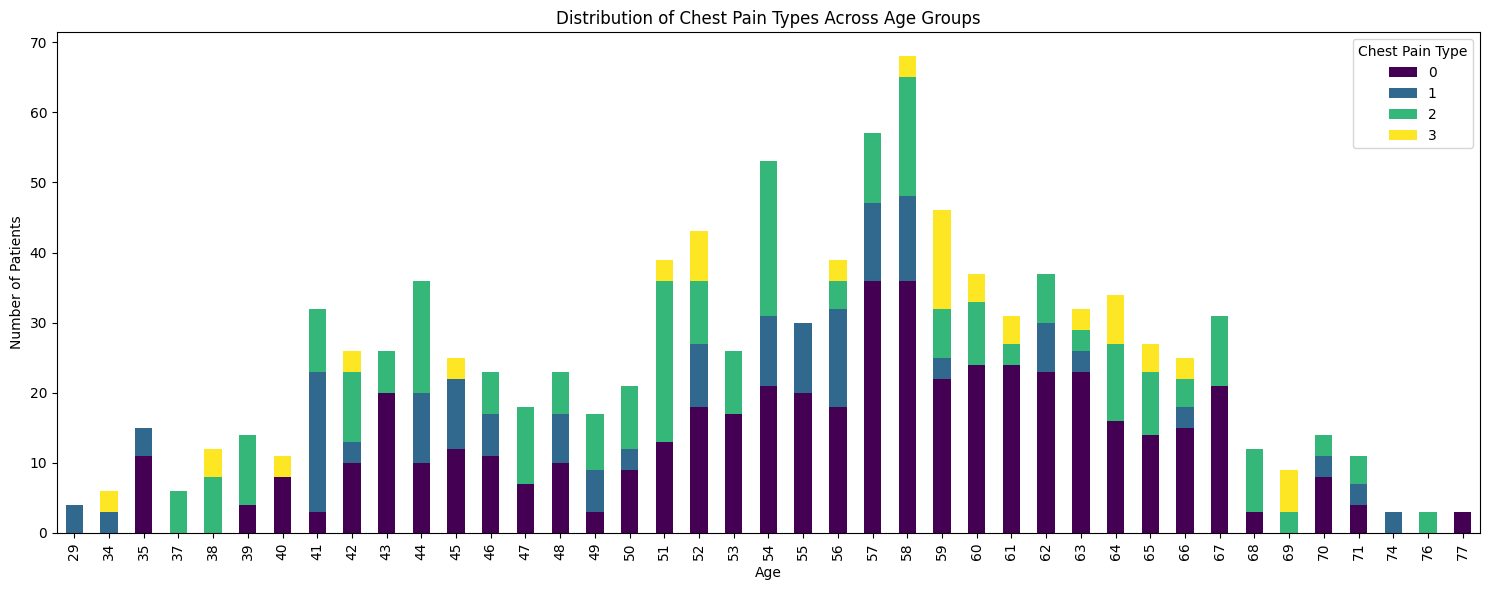

In [63]:
df.groupby('age')['cp'].value_counts().unstack().plot(
    kind='bar', stacked=True, figsize=(15,6), colormap='viridis'
)
mp.xlabel('Age')
mp.ylabel('Number of Patients')
mp.title('Distribution of Chest Pain Types Across Age Groups')
mp.legend(title='Chest Pain Type')
mp.tight_layout()
mp.show()


**3.How does maximum heart rate vary with exercise-induced angina?**


In [64]:
thalach_exang = df.groupby('exang')['thalach'].mean()


In [65]:
print(thalach_exang)

exang
0    155.342647
1    136.837681
Name: thalach, dtype: float64


**4.Is there a significant difference in resting blood pressure between male and female patients?**


In [66]:
bp_by_gender = df.groupby('sex')['trestbps'].mean()

In [67]:
print(bp_by_gender)

sex
0    133.701923
1    130.697055
Name: trestbps, dtype: float64


In [68]:
from scipy.stats import ttest_ind

In [69]:
male_bp = df[df['sex'] == 1]['trestbps']
female_bp = df[df['sex'] == 0]['trestbps']

In [70]:
t_stat, p_value = ttest_ind(male_bp, female_bp)

In [71]:
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")


T-statistic: -2.534, P-value: 0.011


**5.What is the relationship between fasting blood sugar levels and the presence of heart disease?**


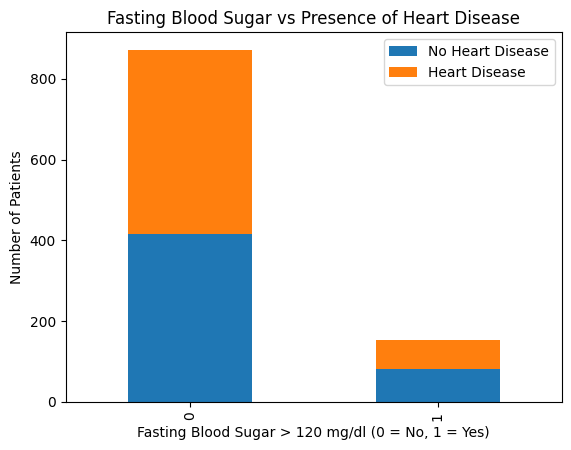

In [72]:
fbs_target_ct = pd.crosstab(df['fbs'], df['target'])

# Plot stacked bar chart
fbs_target_ct.plot(kind='bar', stacked=True)
mp.xlabel('Fasting Blood Sugar > 120 mg/dl (0 = No, 1 = Yes)')
mp.ylabel('Number of Patients')
mp.title('Fasting Blood Sugar vs Presence of Heart Disease')
mp.legend(['No Heart Disease', 'Heart Disease'])
mp.show()


In [73]:
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

**6.How does the number of major vessels (ca) affect the target variable (heart disease presence)?**

In [74]:
ca_target_ct = pd.crosstab(data['ca'], data['target'])

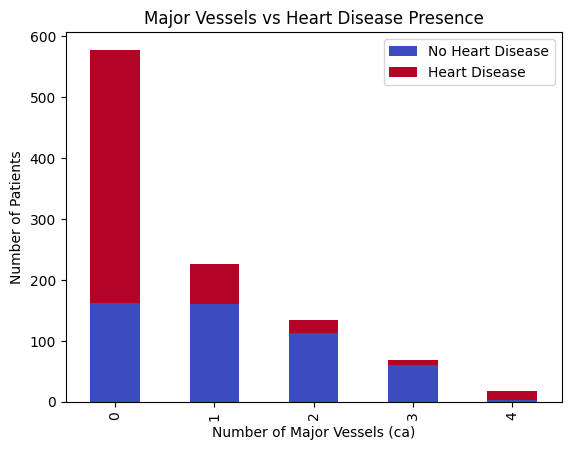

In [75]:
ca_target_ct.plot(kind='bar', stacked=True, colormap='coolwarm')
mp.xlabel('Number of Major Vessels (ca)')
mp.ylabel('Number of Patients')
mp.title('Major Vessels vs Heart Disease Presence')
mp.legend(['No Heart Disease', 'Heart Disease'])
mp.show()

**7.What is the average oldpeak value for patients with different types of chest pain?**


In [76]:
avg_oldpeak_by_cp = data.groupby('cp')['oldpeak'].mean()


In [77]:
print(avg_oldpeak_by_cp)

cp
0    1.438833
1    0.323952
2    0.784507
3    1.380519
Name: oldpeak, dtype: float64


**8.Analyze the distribution of thalassemia types (thal) among patients with heart disease.**


In [78]:
thal_target_ct = pd.crosstab(data['thal'], data['target'])

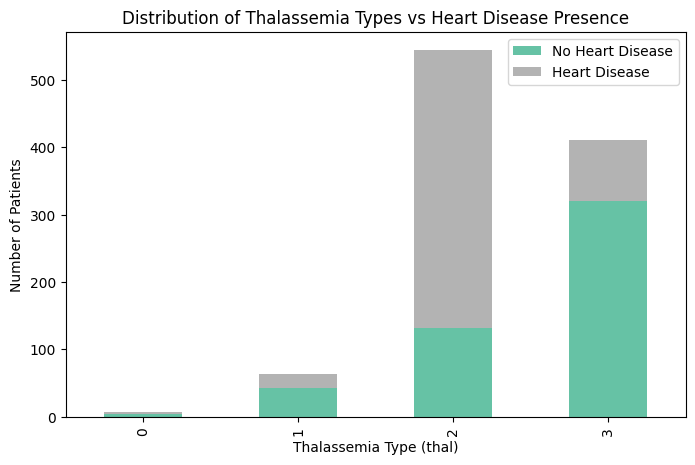

In [79]:
thal_target_ct.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8,5))
mp.xlabel('Thalassemia Type (thal)')
mp.ylabel('Number of Patients')
mp.title('Distribution of Thalassemia Types vs Heart Disease Presence')
mp.legend(['No Heart Disease', 'Heart Disease'])
mp.show()


**9.What are the most common combinations of risk factors in patients with heart disease?**


In [80]:
heart_disease_patients = data[data['target'] == 1]

In [81]:
common_combinations = (
    heart_disease_patients
    .groupby(['cp', 'fbs', 'exang', 'thal'])
    .size()
    .reset_index(name='counts')
    .sort_values(by='counts', ascending=False)
)

In [82]:
print(common_combinations.head(10))

    cp  fbs  exang  thal  counts
15   2    0      0     2     133
8    1    0      0     2      97
1    0    0      0     2      73
19   2    1      0     2      32
16   2    0      0     3      19
4    0    0      1     2      18
23   3    0      0     2      16
9    1    0      0     3      15
17   2    0      1     2      13
24   3    0      0     3      10


**10.Perform a pairwise comparison of clinical measurements for patients with and without heart disease.**

In [83]:
heart_disease_stats = data[data['target'] == 1].describe()

In [84]:
no_heart_disease_stats = data[data['target'] == 0].describe()

In [85]:
print("Heart Disease Patients:\n", heart_disease_stats)
print("\nNo Heart Disease Patients:\n", no_heart_disease_stats)

Heart Disease Patients:
               age         sex          cp    trestbps        chol         fbs  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    52.408745    0.570342    1.378327  129.245247  240.979087    0.134981   
std      9.631804    0.495498    0.945881   16.112188   53.010345    0.342029   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     44.000000    0.000000    1.000000  120.000000  208.000000    0.000000   
50%     52.000000    1.000000    2.000000  130.000000  234.000000    0.000000   
75%     59.000000    1.000000    2.000000  140.000000  265.750000    0.000000   
max     76.000000    1.000000    3.000000  180.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     0.598859  158.585551    0.134981    0.569962    1.593156    0.370722   
st

**Advanced Level Questions**

**1.What is the effect of combining multiple risk factors (age, cholesterol, blood pressure) on the likelihood of heart disease?**


In [86]:
data['age_bin'] = pd.cut(data['age'], bins=[20, 40, 50, 60, 70, 80],
                         labels=['20-39', '40-49', '50-59', '60-69', '70-79'])

In [87]:
data['chol_bin'] = pd.cut(data['chol'], bins=[0, 200, 240, 300, 600],
                          labels=['<200', '200-239', '240-299', '300+'])

In [88]:
data['bp_bin'] = pd.cut(data['trestbps'], bins=[0, 120, 140, 160, 200],
                        labels=['<120', '120-139', '140-159', '160+'])

In [89]:
combination_effect = (
    data.groupby(['age_bin', 'chol_bin', 'bp_bin'], observed=False)['target']
    .mean()
    .reset_index(name='heart_disease_rate')
    .dropna()  # remove combinations with no data
    .sort_values(by='heart_disease_rate', ascending=False)
)

In [90]:
print("Effect of combined risk factors on heart disease rate:")
print(combination_effect)

Effect of combined risk factors on heart disease rate:
   age_bin chol_bin   bp_bin  heart_disease_rate
78   70-79     300+  140-159            1.000000
28   40-49     300+     <120            1.000000
72   70-79  240-299     <120            1.000000
5    20-39  200-239  120-139            1.000000
65   70-79     <200  120-139            1.000000
64   70-79     <200     <120            1.000000
13   20-39     300+  120-139            1.000000
63   60-69     300+     160+            1.000000
17   40-49     <200  120-139            1.000000
60   60-69     300+     <120            1.000000
48   60-69     <200     <120            1.000000
1    20-39     <200  120-139            1.000000
34   50-59     <200  140-159            1.000000
21   40-49  200-239  120-139            0.921053
20   40-49  200-239     <120            0.888889
32   50-59     <200     <120            0.812500
40   50-59  240-299     <120            0.764706
25   40-49  240-299  120-139            0.736842
26   40-49  24

**2.Which clinical measurement has the strongest correlation with heart disease presence?**

In [91]:
correlation_with_target = data.corr(numeric_only=True)['target'].sort_values(ascending=False)

In [92]:
print("Correlation of features with heart disease (target):")
print(correlation_with_target)


Correlation of features with heart disease (target):
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [93]:
strongest_predictor = correlation_with_target.drop('target').idxmax()
strongest_value = correlation_with_target.drop('target').max()

In [94]:
print(f"\nStrongest predictor: {strongest_predictor} (correlation = {strongest_value:.3f})")



Strongest predictor: cp (correlation = 0.435)


**3.Perform a logistic regression analysis to predict the presence of heart disease using all available features.**


In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model = LogisticRegression(max_iter=5000)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


**4.How do the values of the slope of the peak exercise ST segment (slope) vary with different chest pain types?**


In [102]:
slope_cp_counts = data.groupby('cp')['slope'].value_counts().unstack()

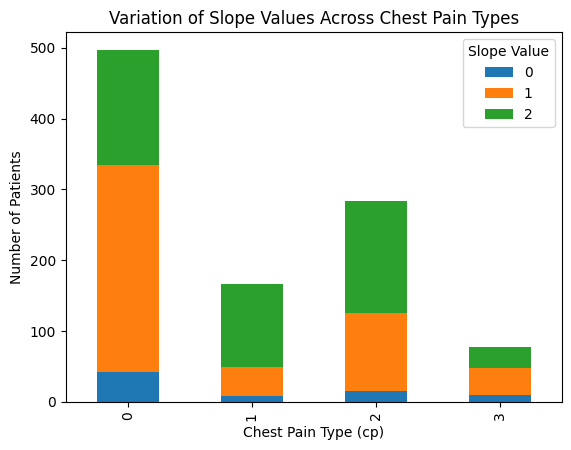

In [103]:
slope_cp_counts.plot(kind='bar', stacked=True)
mp.title("Variation of Slope Values Across Chest Pain Types")
mp.xlabel("Chest Pain Type (cp)")
mp.ylabel("Number of Patients")
mp.legend(title="Slope Value")
mp.show()

In [104]:
data_clean = data.copy()

In [105]:
data_clean = data_clean.replace([np.inf, -np.inf], np.nan)

In [106]:
data_clean = data_clean.dropna(subset=['thal', 'age', 'target'])


In [107]:
data_clean['thal'] = pd.to_numeric(data_clean['thal'], errors='coerce')

In [108]:
data_clean['age'] = pd.to_numeric(data_clean['age'], errors='coerce')

In [109]:
data_clean['target'] = pd.to_numeric(data_clean['target'], errors='coerce')

**5.Analyze the survival rates of patients with different thalassemia types over a period.**

In [110]:
thal_age_survival = data_clean.groupby(['age', 'thal'])['target'].mean().reset_index()

In [111]:
thal_age_pivot = thal_age_survival.pivot(index='age', columns='thal', values='target')


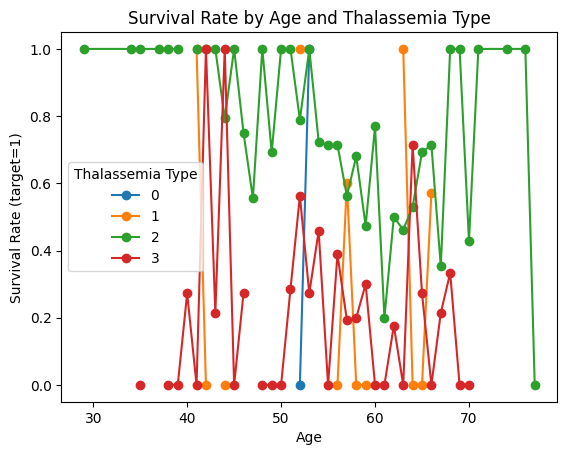

In [112]:
thal_age_pivot.plot(kind='line', marker='o')
mp.title("Survival Rate by Age and Thalassemia Type")
mp.xlabel("Age")
mp.ylabel("Survival Rate (target=1)")
mp.legend(title="Thalassemia Type")
mp.show()